# Individual Assignment. Exploratory Data Analysis





In part 1 of this assignment, we will focus on exploratory data analysis of stock prices. Keep in mind, this assignment is just meant to practice your visualization and pandas skills, it is not meant to be a robust financial analysis or be taken as financial advice.
____
** NOTE: This project is challenging and you have to look things up on your own to try to solve the tasks issued. **
____
We'll focus on bank stocks and see how they progressed throughout the [financial crisis](https://en.wikipedia.org/wiki/Financial_crisis_of_2007%E2%80%9308) all the way to early 2017.

In [1]:
#Daliu
#

# Part 1


## Get the Data

In this section we will learn how to use pandas to directly read data from Yahoo finance using pandas!

First we need to start with the proper imports, which we've already laid out for you here.

*Note: [You'll need to install pandas-datareader for this to work!](https://github.com/pydata/pandas-datareader) Pandas datareader allows you to [read stock information directly from the internet](http://pandas.pydata.org/pandas-docs/stable/remote_data.html) Use these links for install guidance (**pip install pandas-datareader**).*

### The Imports


In [10]:
!pip install pandas-datareader
!pip install --upgrade pandas
import pandas as pd
import numpy as np
pd.core.common.is_list_like = pd.api.types.is_list_like
from pandas_datareader import data, wb

import datetime
%matplotlib inline

Requirement already up-to-date: pandas in d:\ppppython\lib\site-packages (0.25.3)


## Data

We need to get data using pandas datareader. We will get stock information for the following banks:
*  Bank of America
* CitiGroup
* Goldman Sachs
* JPMorgan Chase
* Morgan Stanley
* Wells Fargo

** Figure out how to get the stock data from Jan 1st 2016 to Jan 1st 2017 for each of these banks. Set each bank to be a separate dataframe, with the variable name for that bank being its ticker symbol. This will involve a few steps:**
1. Use datetime to set start and end datetime objects.
2. Figure out the ticker symbol for each bank.
2. Figure out how to use datareader to grab info on the stock.

** Use [this documentation page](https://pandas-datareader.readthedocs.io/en/latest/) for hints and instructions (it should just be a matter of replacing certain values. Use google finance as a source, for example:**
    
    # Bank of America
    BAC = data.DataReader("BAC", 'google', start, end)


In [11]:
start = datetime.datetime(2016, 1, 1)
end = datetime.datetime(2017, 1, 1)

In [12]:
# Bank of America
BAC = data.DataReader("BAC", 'yahoo', start, end)

# CitiGroup
C = data.DataReader("C", 'yahoo', start, end)

# Goldman Sachs
GS = data.DataReader("GS", 'yahoo', start, end)

# JPMorgan Chase
JPM = data.DataReader("JPM", 'yahoo', start, end)

# Morgan Stanley
MS = data.DataReader("MS", 'yahoo', start, end)

# Wells Fargo
WFC = data.DataReader("WFC", 'yahoo', start, end)

In [13]:
WFC.reset_index(inplace=True)
WFC["Date"].value_counts()

2016-09-08    1
2016-03-08    1
2016-07-07    1
2016-09-07    1
2016-11-08    1
             ..
2016-08-09    1
2016-09-09    1
2016-10-10    1
2016-11-10    1
2016-08-08    1
Name: Date, Length: 253, dtype: int64

In [14]:
# Could also do this for a Panel Object
df = data.DataReader(['BAC', 'C', 'GS', 'JPM', 'MS', 'WFC'],'yahoo', start, end)


##### Add a Column_Company Name (this is filled out for you)

In [15]:
BAC["Company"]='BOA'
C["Company"]='Citi'
GS["Company"]='GoldmanSachs'
JPM["Company"]='JPMorgan'
MS["Company"]='MorganStanley'
WFC["Company"]='WellsFargo'

In [8]:
df.head
df.columns

MultiIndex([('Adj Close', 'BAC'),
            ('Adj Close',   'C'),
            ('Adj Close',  'GS'),
            ('Adj Close', 'JPM'),
            ('Adj Close',  'MS'),
            ('Adj Close', 'WFC'),
            (    'Close', 'BAC'),
            (    'Close',   'C'),
            (    'Close',  'GS'),
            (    'Close', 'JPM'),
            (    'Close',  'MS'),
            (    'Close', 'WFC'),
            (     'High', 'BAC'),
            (     'High',   'C'),
            (     'High',  'GS'),
            (     'High', 'JPM'),
            (     'High',  'MS'),
            (     'High', 'WFC'),
            (      'Low', 'BAC'),
            (      'Low',   'C'),
            (      'Low',  'GS'),
            (      'Low', 'JPM'),
            (      'Low',  'MS'),
            (      'Low', 'WFC'),
            (     'Open', 'BAC'),
            (     'Open',   'C'),
            (     'Open',  'GS'),
            (     'Open', 'JPM'),
            (     'Open',  'MS'),
            ( 

##### Draw the closing prices of BAC

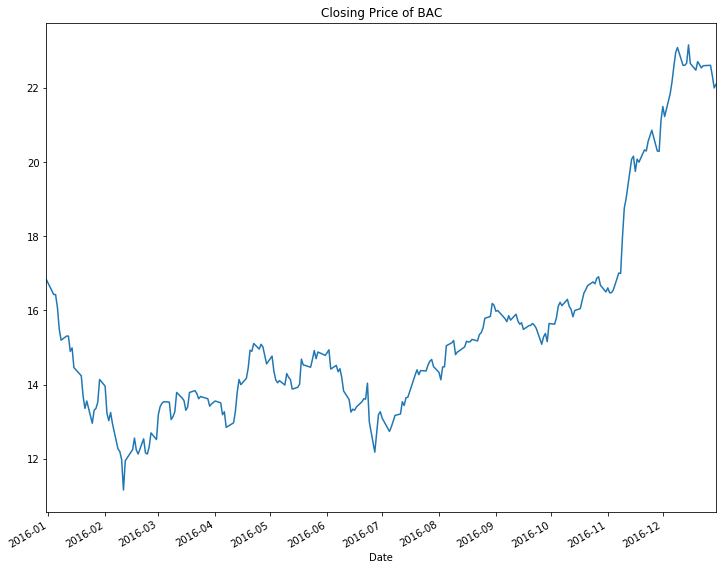

In [16]:
import matplotlib.pyplot as plt

# your code here
BAC['Close'].plot(figsize=(12,10),title='Closing Price of BAC')

##### Append all the data sets

Text(0.5, 1.0, 'Closing Price for All 6 Banks')

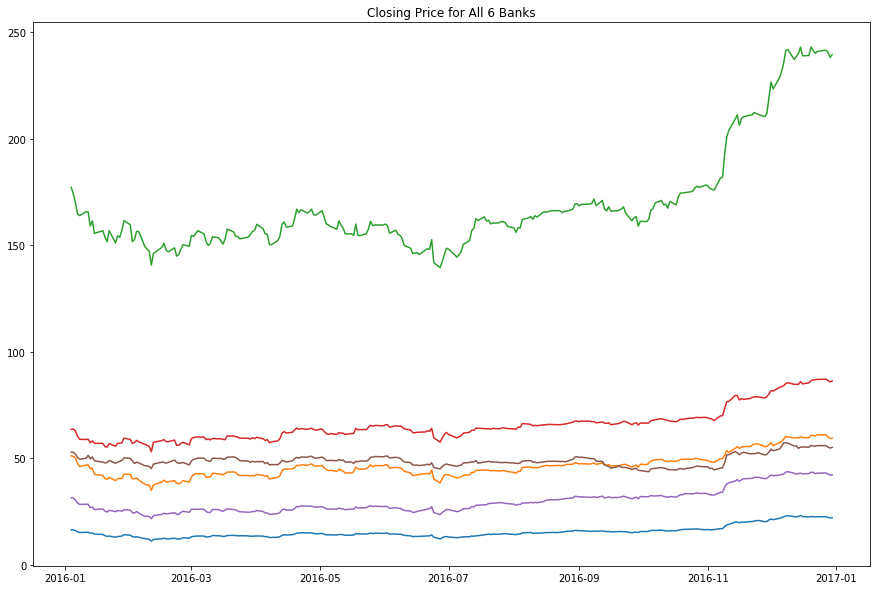

In [10]:
# your code here
#all_data = pd.concat([BAC, C, GS, JPM, MS,WFC])
#all_data = [BAC['Close'], C['Close'], GS['Close'], JPM['Close'], MS['Close'], WFC['Close']]
#all_data
#BAC['Close'].plot(figsize=(12,10),title='Closing Price of BAC')
#C['Close'].plot(figsize=(12,10),title='Closing Price of BAC')
#GS['Close'].plot(figsize=(12,10),title='Closing Price of BAC')
#JPM['Close'].plot(figsize=(12,10),title='Closing Price of BAC')
#MS['Close'].plot(figsize=(12,10),title='Closing Price of BAC')
#WFC['Close'].plot(figsize=(12,10),title='Closing Price of BAC')
plt.figure(figsize = (15,10))
plt.plot(df['Close']['BAC'])
plt.plot(df['Close']['C'])
plt.plot(df['Close']['GS'])
plt.plot(df['Close']['JPM'])
plt.plot(df['Close']['MS'])
plt.plot(df['Close']['WFC'])
plt.title('Closing Price for All 6 Banks')

##### Derive the average closing price for each bank

In [17]:
# your code here
ndf = pd.concat([JPM,GS,WFC,MS,C,BAC])
avg_price = ndf.groupby('Company').Close.mean()
avg_price

D:\PPPPython\lib\site-packages\ipykernel_launcher.py:2: FutureWarning: Sorting because non-concatenation axis is not aligned. A future version
of pandas will change to not sort by default.

To accept the future behavior, pass 'sort=False'.

To retain the current behavior and silence the warning, pass 'sort=True'.

  


Company
BOA               15.437431
Citi              46.407312
GoldmanSachs     169.157747
JPMorgan          65.624427
MorganStanley     29.855889
WellsFargo        48.978735
Name: Close, dtype: float64

##### Plot the average closing price for each bank using matplotlib or plotly and cufflinks


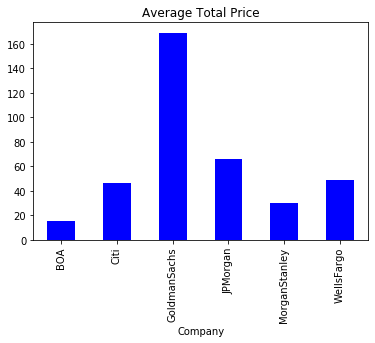

In [13]:
# your code here
avg_price.plot(kind = 'bar', title='Average Total Price',color = "blue" )


** What is the max Close price for each bank's stock throughout the time period?**

In [15]:
# your code here
ndf.groupby('Company').Close.max()

Company
BOA               23.160000
Citi              61.090000
GoldmanSachs     243.089996
JPMorgan          87.129997
MorganStanley     43.730000
WellsFargo        57.290001
Name: Close, dtype: float64

In [50]:
ndf = pd.concat([JPM.reset_index(),GS.reset_index(),WFC,MS.reset_index(),C.reset_index(),BAC.reset_index()])
ndf['returns']=ndf.groupby('Company').Close.pct_change()
ndf

,Date,High,Low,Open,Close,Volume,Adj Close,Company,returns
0,2015-12-31,66.779999,66.000000,66.190002,66.029999,14654300.0,59.106956,JPMorgan,NaN
1,2016-01-04,64.059998,63.009998,63.950001,63.619999,25393200.0,57.331673,JPMorgan,-0.036499
2,2016-01-05,64.129997,63.040001,63.700001,63.730000,16566700.0,57.430794,JPMorgan,0.001729
3,2016-01-06,63.130001,62.340000,62.720001,62.810001,22961500.0,56.601742,JPMorgan,-0.014436
4,2016-01-07,62.000000,60.080002,61.459999,60.270000,27630900.0,54.312798,JPMorgan,-0.040439
...,...,...,...,...,...,...,...,...,...
248,2016-12-23,22.650000,22.430000,22.510000,22.600000,38187800.0,21.477459,BOA,0.002662
249,2016-12-27,22.740000,22.540001,22.709999,22.610001,39988600.0,21.486963,BOA,0.000442
250,2016-12-28,22.670000,22.260000,22.620001,22.330000,52652900.0,21.220873,BOA,-0.012384
251,2016-12-29,22.389999,21.770000,22.330000,22.000000,79188400.0,20.907263,BOA,-0.014778


In [105]:
best = ndf.loc[ndf.groupby('Company').returns.transform(max) == ndf['returns'],['Company','Date','returns']].reset_index()
worst = ndf.loc[ndf.groupby('Company').returns.transform(min) == ndf['returns'],['Company','Date','returns']].reset_index()
con = pd.concat([best, worst],axis=1)
# best = ndf.groupby('Company').returns.max()
# worst = ndf.groupby('Company').returns.min()
# a = ndf.loc[ndf['returns']==best,:]
# b = ndf.loc[ndf['returns']==worst,:]
# pd.concat([a, b],axis=0)
# for i in best:
#     print(i)
# con.reindex(con.Company)
# con = con.drop(columns=['Company'])
con2 = con.iloc[:,[1,2,3,6,7]]
con3 = con2.set_index('Company')
con3

,Date,returns,Date,returns
Company,,,,
JPMorgan,2016-02-12,0.083286,2016-06-24,-0.069477
GoldmanSachs,2016-11-09,0.058872,2016-06-24,-0.070745
WellsFargo,2016-11-10,0.075849,2016-06-24,-0.045919
MorganStanley,2016-11-09,0.070968,2016-06-24,-0.101502
Citi,2016-02-12,0.073185,2016-06-24,-0.093567
BOA,2016-02-12,0.070789,2016-06-24,-0.074074


** Create a new dataframe called returns. This dataframe will contain the returns for each bank's stock. returns are typically defined by:**

$$r_t = \frac{p_t - p_{t-1}}{p_{t-1}} = \frac{p_t}{p_{t-1}} - 1$$

** We can use pandas pct_change() method on the Close column to create a new dataframe representing this return value. Use .groupby().**

In [18]:
# your code here
ndf['returns']=ndf.groupby('Company').Close.pct_change()
ndf

,Adj Close,Close,Company,Date,High,Low,Open,Volume,returns
2015-12-31,59.106956,66.029999,JPMorgan,NaT,66.779999,66.000000,66.190002,14654300.0,NaN
2016-01-04,57.331673,63.619999,JPMorgan,NaT,64.059998,63.009998,63.950001,25393200.0,-0.036499
2016-01-05,57.430794,63.730000,JPMorgan,NaT,64.129997,63.040001,63.700001,16566700.0,0.001729
2016-01-06,56.601742,62.810001,JPMorgan,NaT,63.130001,62.340000,62.720001,22961500.0,-0.014436
2016-01-07,54.312798,60.270000,JPMorgan,NaT,62.000000,60.080002,61.459999,27630900.0,-0.040439
...,...,...,...,...,...,...,...,...,...
2016-12-23,21.477459,22.600000,BOA,NaT,22.650000,22.430000,22.510000,38187800.0,0.002662
2016-12-27,21.486963,22.610001,BOA,NaT,22.740000,22.540001,22.709999,39988600.0,0.000442
2016-12-28,21.220873,22.330000,BOA,NaT,22.670000,22.260000,22.620001,52652900.0,-0.012384
2016-12-29,20.907263,22.000000,BOA,NaT,22.389999,21.770000,22.330000,79188400.0,-0.014778


** Using this returns DataFrame, figure out on what dates each bank stock had the best and worst single day returns. Did anything significant happen that day?**

In [19]:
# your code here


** Please state here what you have noticed. Did anything significant happen in that time frame? **

** Take a look at the standard deviation of the returns, which stock would you classify as the riskiest over the entire time period? **

In [20]:
#  your code here
std = ndf.groupby('Company').returns.std()
std

Company
BOA              0.020209
Citi             0.020060
GoldmanSachs     0.016886
JPMorgan         0.015472
MorganStanley    0.020555
WellsFargo       0.015015
Name: returns, dtype: float64

** Which would you classify as the riskiest for the year 2016? **

In [21]:
# your code here
std.max()

0.020554510109818114

In [22]:
# MorganStanley is the riskest because its std is the highest 

** Create a density plot using any library you like to visualize the previous year's return for each bank **

Company
BOA              AxesSubplot(0.125,0.125;0.775x0.755)
Citi             AxesSubplot(0.125,0.125;0.775x0.755)
GoldmanSachs     AxesSubplot(0.125,0.125;0.775x0.755)
JPMorgan         AxesSubplot(0.125,0.125;0.775x0.755)
MorganStanley    AxesSubplot(0.125,0.125;0.775x0.755)
WellsFargo       AxesSubplot(0.125,0.125;0.775x0.755)
Name: returns, dtype: object

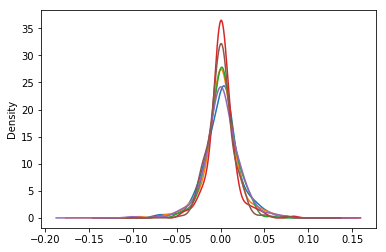

In [34]:
# your code here
ndf.groupby('Company')['returns'].plot(kind='kde')

### Moving Averages

** Please derive the moving averages for these stocks in the year 2016. Use .rolling() in pandas to get the rolling average calculation. ** 



In [25]:
# your code here
ndf.groupby('Company')['Close'].rolling(window = 30).mean()

Company                        
BOA         2016-01-04 00:00:00          NaN
            2016-01-05 00:00:00          NaN
            2016-01-06 00:00:00          NaN
            2016-01-07 00:00:00          NaN
            2016-01-08 00:00:00          NaN
                                     ...    
WellsFargo  247                    54.171000
            248                    54.311667
            249                    54.381667
            250                    54.456667
            251                    54.571000
Name: Close, Length: 1512, dtype: float64

** Plot the rolling 30 day average against the Close Price for Bank Of America's stock for the year 2016**

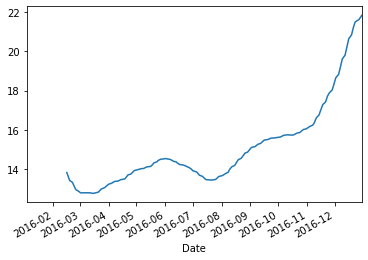

In [26]:
# your code here
BAC['Close'].rolling(window=30).mean().plot()

** Create a heatmap of the correlation between the stocks Close Price.**


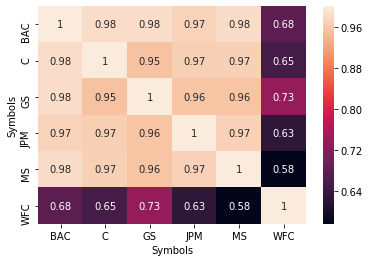

In [27]:
# your code here
import seaborn as sb
sb.heatmap(df['Close'].corr(),annot=True)

# Part 2. 

Please generate some visualization using the crunchbase database you downloaded for the midterm. Feel free to use any plotting packages (in Python), and generate any types of figures. You may also comment on the generated figures, and explain any insights you have obtained. 

# Great Job!


In [2]:
import sqlite3
import pandas as pd
conn = sqlite3.connect("crunchbase_analysis.db")
df1 = pd.read_sql_query("SELECT * FROM crunchbase_companies", conn)
df1.head()

,permalink,name,homepage_url,category_code,funding_total_usd,status,country_code,state_code,region,city,funding_rounds,founded_at,founded_at_clean,id
0,/company/8868,8868,http://www.8868.cn,None,NaN,operating,None,None,unknown,None,1.0,None,None,1
1,/company/21e6,2.10E+07,None,None,5050000.0,operating,USA,CA,SF Bay,San Francisco,1.0,1/1/13,2013-01-01,2
2,/company/club-domains,.Club Domains,http://dotclub.com,software,7000000.0,operating,USA,FL,Fort Lauderdale,Oakland Park,1.0,10/10/11,2011-10-10,3
3,/company/fox-networks,.Fox Networks,http://www.dotfox.com,advertising,4912394.0,closed,ARG,None,Buenos Aires,Buenos Aires,1.0,None,None,4
4,/company/a-list-games,[a]list games,http://www.alistgames.com,games_video,9300000.0,operating,None,None,unknown,None,1.0,None,None,5


In [3]:
df2 = pd.read_sql_query("SELECT * FROM crunchbase_investments", conn)
df2.head()

,company_permalink,company_name,company_category_code,company_country_code,company_state_code,company_region,company_city,investor_permalink,investor_name,investor_category_code,...,investor_state_code,investor_region,investor_city,funding_round_type,funded_at,funded_month,funded_quarter,funded_year,raised_amount_usd,id
0,/company/tokita-investments,Tokita Investments,consulting,JPN,None,TBD,Okinawa Ken,/company/01startups,01Startups,None,...,None,unknown,None,angel,9/26/13,2013-09,2013-Q3,2013.0,5000.0,1
1,/company/advercar,AdverCar,advertising,USA,CA,SF Bay,San Francisco,/company/1-800-flowers-com,1-800-FLOWERS.COM,ecommerce,...,NY,New York,New York,series-a,10/30/12,2012-10,2012-Q4,2012.0,2000000.0,2
2,/company/launchgram,LaunchGram,news,USA,CA,SF Bay,Mountain View,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/23/12,2012-01,2012-Q1,2012.0,20000.0,3
3,/company/utap,uTaP,messaging,USA,None,United States - Other,None,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,other,1/1/12,2012-01,2012-Q1,2012.0,20000.0,4
4,/company/zoopshop,ZoopShop,software,USA,OH,Columbus,columbus,/company/10xelerator,10Xelerator,finance,...,OH,Columbus,Columbus,angel,2/15/12,2012-02,2012-Q1,2012.0,20000.0,5


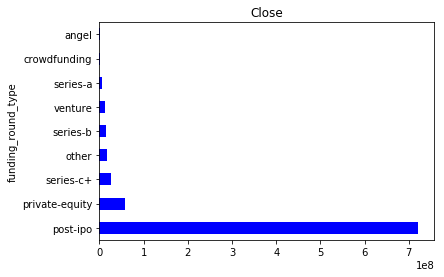

In [8]:
avg_fund = df2.groupby('funding_round_type').raised_amount_usd.mean()
avg_fund = avg_fund.sort_values(ascending = False)
avg_fund.plot(kind = 'barh', title = 'Close', color = 'blue')

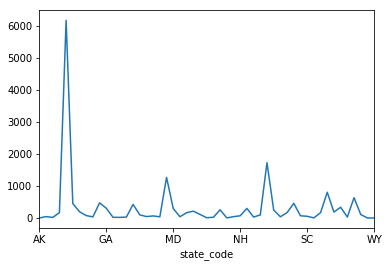

In [46]:
df1.groupby('state_code')['permalink'].count().plot()

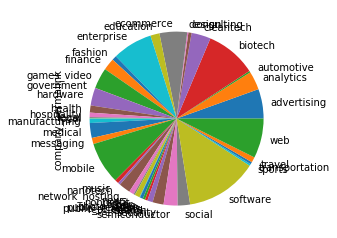

In [47]:
df2.groupby('company_category_code')['company_permalink'].count().plot.pie()